# Imports

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter
import re
from ast import literal_eval


# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly.express
import plotly.express as px

# Exploratory Data Analysis

## Loading dataset

In [2]:
csv_path = '../../FeedMe/raw_data/Recipes/Food Ingredients and Recipe Dataset with Image Name Mapping.csv' 

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df.shape

(13501, 6)

In [5]:
df.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


## Inital Cleaning and Renaming

In [6]:
df = df.dropna()

In [7]:
df.drop(columns=['Ingredients', 'Unnamed: 0'], inplace=True)

In [8]:
df.rename(columns={'Cleaned_Ingredients': 'Ingredients'}, inplace=True)

In [9]:
df['Ingredients'] = df['Ingredients'].apply(literal_eval)

In [10]:
df.shape

(13493, 4)

In [11]:
df.head()

,Title,Instructions,Image_Name,Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"[1 (3½–4-lb.) whole chicken, 2¾ tsp. kosher sa..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo..."
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"[1 (¾- to 1-pound) round Italian loaf, cut int..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"[1 teaspoon dark brown sugar, 1 teaspoon hot w..."


## Data Cleaning

In [12]:
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()
remove_words = ['storebought', 'garnish', 'homemade', 'fresh',
              'coarsely', 'grated', 'evaporated', 'pound',
              'new', 'inch', 'diameter', 'torn',
              'sturdy', 'loaf', 'ground', 'flake',
              'piece', 'gala', 'cored','melted',
              'unsalted','salted','whole', 'divided',
              'kosher','cup', 'tsp', 'tbsp',
              'small', 'medium', 'large', 'lb',
              'finely', 'thinly', 'chopped', 'freshly',
              'sliced', 'cut', 'crushed', 'teaspoon',
              'plus', 'room', 'temperature', 'dry',
              'lady', 'oz', 'total', 'goodquality',
              'tablespoon', 'g', 'ounce', 'peeled']

In [13]:
def cleaning(ingredients):
    cleaned_ingredients = []
    ingredients = list(map(lambda x: x.lower(), ingredients))
    ingredients = list(map(lambda x: ''.join(word for word in x if not word.isdigit()), ingredients))
    ingredients = list(map(lambda x: ''.join(word for word in x if not word in string.punctuation), ingredients))
    for i in ingredients:
        word_tokens = word_tokenize(i)
        word_tokens = [lemmatizer.lemmatize(w) for w in word_tokens]
        text = [w for w in word_tokens if not w in stop_words if not w in remove_words if w.isalpha()]
        cleaned_ingredients.append(" ".join(text))
    return cleaned_ingredients

In [14]:
df['Cleaned_Ingredients'] = df['Ingredients'].apply(lambda x: cleaning(x))

In [15]:
df.head()

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"[1 (3½–4-lb.) whole chicken, 2¾ tsp. kosher sa...","[chicken, salt, acorn squash, sage, rosemary, ..."
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema..."
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok..."
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"[1 (¾- to 1-pound) round Italian loaf, cut int...","[round italian cube, olive oil, sweet italian ..."
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"[1 teaspoon dark brown sugar, 1 teaspoon hot w...","[dark brown sugar, hot water, bourbon, lemon j..."


## Transposing labels

In [16]:
ingredients = ['apple', 'banana', 'beef', 'blueberries',
               'bread', 'butter', 'carrot', 'cheese',
               'chicken', 'chocolate','corn', 'eggs',
               'flour','beans', 'ham',
               'cream', 'lime', 'milk', 'mushrooms',
               'onion', 'potato', 'shrimp', 'spinach',
               'strawberries', 'sugar', 'tomato']
len(ingredients)

26

In [17]:
ingredients_lem = [lemmatizer.lemmatize(w) for w in ingredients]
ingredients_lem

['apple',
 'banana',
 'beef',
 'blueberry',
 'bread',
 'butter',
 'carrot',
 'cheese',
 'chicken',
 'chocolate',
 'corn',
 'egg',
 'flour',
 'bean',
 'ham',
 'cream',
 'lime',
 'milk',
 'mushroom',
 'onion',
 'potato',
 'shrimp',
 'spinach',
 'strawberry',
 'sugar',
 'tomato']

In [18]:
siders = ['oil', 'cider', 'broth', 'juice', 'brisket', 'ravioli', 'sauce']

In [19]:
def relabelling(ingredients):
    relabeled_ingredients = []
    for i in ingredients:
        word_tokens = word_tokenize(i)
        label = i
        for ingredient in ingredients_lem:
            if ingredient in word_tokens:
                if not any(word in siders for word in i.split(' ')):
                    label = ingredient
        relabeled_ingredients.append(label)
    return relabeled_ingredients

In [20]:
df['Relabelled_Ingredients'] = df['Cleaned_Ingredients'].apply(lambda x: relabelling(x))

In [21]:
df.head()
df.columns

Index(['Title', 'Instructions', 'Image_Name', 'Ingredients',
       'Cleaned_Ingredients', 'Relabelled_Ingredients'],
      dtype='object')

## One-Hot_Encoder

In [22]:
def one_hot_encoder(row):
    for ingredient in ingredients_lem:
        if ingredient in row['Relabelled_Ingredients']:
            row[ingredient] = 1
        else:
            row[ingredient] = 0
    return row

In [23]:
df = df.apply(one_hot_encoder, axis=1)

In [24]:
df.columns

Index(['Title', 'Instructions', 'Image_Name', 'Ingredients',
       'Cleaned_Ingredients', 'Relabelled_Ingredients', 'apple', 'banana',
       'beef', 'blueberry', 'bread', 'butter', 'carrot', 'cheese', 'chicken',
       'chocolate', 'corn', 'egg', 'flour', 'bean', 'ham', 'cream', 'lime',
       'milk', 'mushroom', 'onion', 'potato', 'shrimp', 'spinach',
       'strawberry', 'sugar', 'tomato'],
      dtype='object')

In [25]:
df.head()

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,apple,banana,beef,blueberry,...,lime,milk,mushroom,onion,potato,shrimp,spinach,strawberry,sugar,tomato
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"[1 (3½–4-lb.) whole chicken, 2¾ tsp. kosher sa...","[chicken, salt, acorn squash, sage, rosemary, ...","[chicken, salt, acorn squash, sage, rosemary, ...",1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...",0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...",0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"[1 (¾- to 1-pound) round Italian loaf, cut int...","[round italian cube, olive oil, sweet italian ...","[round italian cube, olive oil, sweet italian ...",0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"[1 teaspoon dark brown sugar, 1 teaspoon hot w...","[dark brown sugar, hot water, bourbon, lemon j...","[sugar, hot water, bourbon, lemon juice, butte...",0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Finishing touches

In [26]:
def tokenize(list_x):
    tokenized = []
    for i in list_x:
        word_tokens = word_tokenize(i)
        for x in word_tokens:
            tokenized.append(x)
    return tokenized
    

In [27]:
df['Tokenized_Ingredients'] = df['Relabelled_Ingredients'].apply(lambda x: tokenize(x))

In [28]:
df = df[['Title', 'Instructions','Image_Name',
                     'Ingredients', 'Cleaned_Ingredients', 'Relabelled_Ingredients', 'Tokenized_Ingredients',
                     'apple','banana','beef','blueberry','bread','butter','carrot','cheese','chicken','chocolate','corn',
                     'egg','flour','bean','ham','cream','lime','milk','mushroom','onion','potato','shrimp',
                     'spinach','strawberry','sugar','tomato']]

In [29]:
df.head()

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,lime,milk,mushroom,onion,potato,shrimp,spinach,strawberry,sugar,tomato
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"[1 (3½–4-lb.) whole chicken, 2¾ tsp. kosher sa...","[chicken, salt, acorn squash, sage, rosemary, ...","[chicken, salt, acorn squash, sage, rosemary, ...","[chicken, salt, acorn, squash, sage, rosemary,...",1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Italian Sausage and Bread Stuffing,Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"[1 (¾- to 1-pound) round Italian loaf, cut int...","[round italian cube, olive oil, sweet italian ...","[round italian cube, olive oil, sweet italian ...","[round, italian, cube, olive, oil, sweet, ital...",0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Newton's Law,Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"[1 teaspoon dark brown sugar, 1 teaspoon hot w...","[dark brown sugar, hot water, bourbon, lemon j...","[sugar, hot water, bourbon, lemon juice, butte...","[sugar, hot, water, bourbon, lemon, juice, but...",0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Filtering

In [30]:
filtering_ingredients = {'fish': ['salmon', 'fish', 'crab', 'scallop', 'tuna', 'cod',
                                  'anchovy', 'halibut', 'sea', 'bass', 'mussel', 'oyster', 
                                  'trout', 'squid', 'seafood'],
                         'meat': ['pork','lamb', 'turkey', 'bacon','sausage', 'ham',
                                  'prosciutto', 'chorizo', 'veal'],
                         'vegetable': ['squash', 'pea', 'pumpkin', 'beet', 'cucumber', 'kale', 
                                       'zucchini', 'asparagus', 'eggplant', 'cabbage', 'broccoli', 
                                       'celery', 'leek', 'artichoke', 'polenta', 'radish', 'lentil', 
                                       'brussels', 'horseradish', 'tofu', 'radicchio', 'lettuce', 
                                       'truffle', 'escarole', 'kimchi', 'collard', 'turnip', 'endive'],
                         'fruits': ['orange', 'coconut', 'cherry', 'cranberry', 'pear', 'peach', 'raspberry',
                                    'avocado', 'pineapple', 'apricot', 'fig', 'mango', 'pomegranate', 
                                    'blackberry', 'rhubarb', 'grape', 'raisin', 'grapefruit', 
                                    'watermelon', 'lobster', 'melon'],
                         'other': ['pizza', 'couscous', 'margarita', 'champagne']}

In [31]:
def filter(ingredients):
    list_filter = []
    for value in filtering_ingredients.values():
        for ingredient in value:
            list_filter.append(ingredient)
    for ingredient in list_filter:
        if any(word for word in list_filter if word in ingredients):
            return 1
        else:
            return 0

In [32]:
df['Remove'] = df['Tokenized_Ingredients'].apply(lambda x: filter(x))

In [33]:
df_filtered = df[df['Remove']==0]


In [34]:
df_filtered.shape

(4805, 34)

In [35]:
df_filtered.head()

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,milk,mushroom,onion,potato,shrimp,spinach,strawberry,sugar,tomato,Remove
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,1,0,1,0,0,0,0,0,0,0
5,Warm Comfort,Place 2 chamomile tea bags in a heatsafe vesse...,warm-comfort-tequila-chamomile-toddy,"[2 chamomile tea bags, 1½ oz. reposado tequila...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile, tea, bag, reposado, tequila, lemon...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Apples and Oranges,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",apples-and-oranges-spiked-cider,"[3 oz. Grand Marnier, 1 oz. Amaro Averna, Smal...","[grand marnier, amaro averna, pat butter, hot ...","[grand marnier, amaro averna, butter, hot appl...","[grand, marnier, amaro, averna, butter, hot, a...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Turmeric Hot Toddy,"For the turmeric syrup, combine ½ cup hot wate...",turmeric-hot-toddy-claire-sprouse,"[¼ cup granulated sugar, ¾ tsp. ground turmeri...","[granulated sugar, turmeric, amontillado sherr...","[sugar, turmeric, amontillado sherry, bourbon ...","[sugar, turmeric, amontillado, sherry, bourbon...",0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering: Prep Time

In [36]:
def prep_time(instructions):
    prep_time = 0
    default_time = 2
    pattern_minutes = '(\d+) minutes'
    pattern_hour = '(\d) hour'
    sentences = instructions.split(".")
    prep_time += default_time * len(sentences)
    for sentence in sentences:
        search_minutes = re.findall(pattern_minutes, sentence)
        search_hours = re.findall(pattern_hour, sentence)
        for m in search_minutes:
            prep_time += int(m)
        for h in search_hours:
            prep_time += (int(h) * 60)
    return prep_time

In [37]:
df_filtered['Prep Time'] = df_filtered['Instructions'].apply(lambda x: prep_time(x))

/var/folders/vp/c987_zkx4hg6k0yfsdxsvmd80000gn/T/ipykernel_82795/914396881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Prep Time'] = df_filtered['Instructions'].apply(lambda x: prep_time(x))


In [38]:
df_filtered.head()

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,mushroom,onion,potato,shrimp,spinach,strawberry,sugar,tomato,Remove,Prep Time
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,0,1,0,0,0,0,0,0,34
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,0,1,0,0,0,0,0,0,0,44
5,Warm Comfort,Place 2 chamomile tea bags in a heatsafe vesse...,warm-comfort-tequila-chamomile-toddy,"[2 chamomile tea bags, 1½ oz. reposado tequila...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile, tea, bag, reposado, tequila, lemon...",0,0,0,...,0,0,0,0,0,0,0,0,0,21
6,Apples and Oranges,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",apples-and-oranges-spiked-cider,"[3 oz. Grand Marnier, 1 oz. Amaro Averna, Smal...","[grand marnier, amaro averna, pat butter, hot ...","[grand marnier, amaro averna, butter, hot appl...","[grand, marnier, amaro, averna, butter, hot, a...",0,0,0,...,0,0,0,0,0,0,0,0,0,18
7,Turmeric Hot Toddy,"For the turmeric syrup, combine ½ cup hot wate...",turmeric-hot-toddy-claire-sprouse,"[¼ cup granulated sugar, ¾ tsp. ground turmeri...","[granulated sugar, turmeric, amontillado sherr...","[sugar, turmeric, amontillado sherry, bourbon ...","[sugar, turmeric, amontillado, sherry, bourbon...",0,0,0,...,0,0,0,0,0,0,1,0,0,30


In [39]:
def prep_time_range(prep_time_min):
    prep_time_h = round(prep_time_min / 60)
    return f'{prep_time_h} - {prep_time_h + 1} hours'

In [40]:
df_filtered['Prep Time Range'] = df_filtered['Prep Time'].apply(lambda x: prep_time_range(x))

/var/folders/vp/c987_zkx4hg6k0yfsdxsvmd80000gn/T/ipykernel_82795/4095375757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Prep Time Range'] = df_filtered['Prep Time'].apply(lambda x: prep_time_range(x))


In [41]:
df_filtered.head()

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,onion,potato,shrimp,spinach,strawberry,sugar,tomato,Remove,Prep Time,Prep Time Range
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,1,0,0,0,0,0,0,34,1 - 2 hours
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,1,0,0,0,0,0,0,0,44,1 - 2 hours
5,Warm Comfort,Place 2 chamomile tea bags in a heatsafe vesse...,warm-comfort-tequila-chamomile-toddy,"[2 chamomile tea bags, 1½ oz. reposado tequila...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile, tea, bag, reposado, tequila, lemon...",0,0,0,...,0,0,0,0,0,0,0,0,21,0 - 1 hours
6,Apples and Oranges,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",apples-and-oranges-spiked-cider,"[3 oz. Grand Marnier, 1 oz. Amaro Averna, Smal...","[grand marnier, amaro averna, pat butter, hot ...","[grand marnier, amaro averna, butter, hot appl...","[grand, marnier, amaro, averna, butter, hot, a...",0,0,0,...,0,0,0,0,0,0,0,0,18,0 - 1 hours
7,Turmeric Hot Toddy,"For the turmeric syrup, combine ½ cup hot wate...",turmeric-hot-toddy-claire-sprouse,"[¼ cup granulated sugar, ¾ tsp. ground turmeri...","[granulated sugar, turmeric, amontillado sherr...","[sugar, turmeric, amontillado sherry, bourbon ...","[sugar, turmeric, amontillado, sherry, bourbon...",0,0,0,...,0,0,0,0,0,1,0,0,30,0 - 1 hours


## Suggestion Scoring

In [42]:
df_filtered[ingredients_lem]

,apple,banana,beef,blueberry,bread,butter,carrot,cheese,chicken,chocolate,...,lime,milk,mushroom,onion,potato,shrimp,spinach,strawberry,sugar,tomato
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13492,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
13494,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13496,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
13498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
def score(row, vector):
    #computes dot product
    A = row.to_numpy()
    row['score'] = np.matmul(A, vector)
    return row

In [44]:
V = np.ones(26)

In [45]:
len(ingredients_lem)

26

In [46]:
df_filtered.columns

Index(['Title', 'Instructions', 'Image_Name', 'Ingredients',
       'Cleaned_Ingredients', 'Relabelled_Ingredients',
       'Tokenized_Ingredients', 'apple', 'banana', 'beef', 'blueberry',
       'bread', 'butter', 'carrot', 'cheese', 'chicken', 'chocolate', 'corn',
       'egg', 'flour', 'bean', 'ham', 'cream', 'lime', 'milk', 'mushroom',
       'onion', 'potato', 'shrimp', 'spinach', 'strawberry', 'sugar', 'tomato',
       'Remove', 'Prep Time', 'Prep Time Range'],
      dtype='object')

In [47]:
df_filtered[ingredients_lem].apply(lambda x: score(x, V), axis=1).sort_values(by='score', ascending=False)

,apple,banana,beef,blueberry,bread,butter,carrot,cheese,chicken,chocolate,...,milk,mushroom,onion,potato,shrimp,spinach,strawberry,sugar,tomato,score
9684,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
5774,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
13056,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,9.0
8881,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0
402,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_filtered

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,onion,potato,shrimp,spinach,strawberry,sugar,tomato,Remove,Prep Time,Prep Time Range
1,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,1,0,0,0,0,0,0,34,1 - 2 hours
2,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,1,0,0,0,0,0,0,0,44,1 - 2 hours
5,Warm Comfort,Place 2 chamomile tea bags in a heatsafe vesse...,warm-comfort-tequila-chamomile-toddy,"[2 chamomile tea bags, 1½ oz. reposado tequila...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile, tea, bag, reposado, tequila, lemon...",0,0,0,...,0,0,0,0,0,0,0,0,21,0 - 1 hours
6,Apples and Oranges,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",apples-and-oranges-spiked-cider,"[3 oz. Grand Marnier, 1 oz. Amaro Averna, Smal...","[grand marnier, amaro averna, pat butter, hot ...","[grand marnier, amaro averna, butter, hot appl...","[grand, marnier, amaro, averna, butter, hot, a...",0,0,0,...,0,0,0,0,0,0,0,0,18,0 - 1 hours
7,Turmeric Hot Toddy,"For the turmeric syrup, combine ½ cup hot wate...",turmeric-hot-toddy-claire-sprouse,"[¼ cup granulated sugar, ¾ tsp. ground turmeri...","[granulated sugar, turmeric, amontillado sherr...","[sugar, turmeric, amontillado sherry, bourbon ...","[sugar, turmeric, amontillado, sherry, bourbon...",0,0,0,...,0,0,0,0,0,1,0,0,30,0 - 1 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13492,Cornmeal Pancakes with Honey-Pecan Butter,"Using electric mixer, beat 1/2 cup butter, hon...",cornmeal-pancakes-with-honey-pecan-butter-108554,[1/2 cup (1 stick) unsalted European-style but...,"[stick europeanstyle butter, honey, generous p...","[butter, honey, generous pinch cinnamon, toast...","[butter, honey, generous, pinch, cinnamon, toa...",0,0,0,...,0,0,0,0,0,1,0,0,34,1 - 2 hours
13494,Ginger-Pecan Roulade with Honey-Glazed Pecans,Preheat oven to 350°F. Line bottom and sides o...,ginger-pecan-roulade-with-honey-glazed-pecans-...,"[1/2 stick (1/4 cup) unsalted butter, melted, ...","[stick butter additional brushing pan, pecan t...","[butter, pecan toasted cooled, flour, unsweete...","[butter, pecan, toasted, cooled, flour, unswee...",0,0,0,...,0,0,0,0,0,1,0,0,55,1 - 2 hours
13496,Brownie Pudding Cake,Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"[1 cup all-purpose flour, 2/3 cup unsweetened ...","[allpurpose flour, unsweetened cocoa powder, d...","[flour, unsweetened cocoa powder, doubleacting...","[flour, unsweetened, cocoa, powder, doubleacti...",0,0,0,...,0,0,0,0,0,1,0,0,54,1 - 2 hours
13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,[Leftover katsuo bushi (dried bonito flakes) f...,[leftover katsuo bushi dried bonito making das...,[leftover katsuo bushi dried bonito making das...,"[leftover, katsuo, bushi, dried, bonito, makin...",0,0,0,...,0,0,0,0,0,1,0,0,47,1 - 2 hours


# Features based on user preferences

## Recipe complexity

### Creating a new dataframe and transforming columns

In [98]:
data = df_filtered
data = data.reset_index()
del data['index']
data['Instructions'] = data.Instructions.apply(str)
data['number_of_ingredients'] = data.apply(lambda x: len(x['Relabelled_Ingredients']), axis = 1 )
data['length_of_instructions'] = data.apply(lambda x: len(x['Instructions']), axis = 1 )
data

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,shrimp,spinach,strawberry,sugar,tomato,Remove,Prep Time,Prep Time Range,number_of_ingredients,length_of_instructions
0,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,0,0,0,0,0,34,1 - 2 hours,7,613
1,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,0,0,0,0,0,0,44,1 - 2 hours,10,862
2,Warm Comfort,Place 2 chamomile tea bags in a heatsafe vesse...,warm-comfort-tequila-chamomile-toddy,"[2 chamomile tea bags, 1½ oz. reposado tequila...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile, tea, bag, reposado, tequila, lemon...",0,0,0,...,0,0,0,0,0,0,21,0 - 1 hours,4,354
3,Apples and Oranges,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",apples-and-oranges-spiked-cider,"[3 oz. Grand Marnier, 1 oz. Amaro Averna, Smal...","[grand marnier, amaro averna, pat butter, hot ...","[grand marnier, amaro averna, butter, hot appl...","[grand, marnier, amaro, averna, butter, hot, a...",0,0,0,...,0,0,0,0,0,0,18,0 - 1 hours,7,465
4,Turmeric Hot Toddy,"For the turmeric syrup, combine ½ cup hot wate...",turmeric-hot-toddy-claire-sprouse,"[¼ cup granulated sugar, ¾ tsp. ground turmeri...","[granulated sugar, turmeric, amontillado sherr...","[sugar, turmeric, amontillado sherry, bourbon ...","[sugar, turmeric, amontillado, sherry, bourbon...",0,0,0,...,0,0,0,1,0,0,30,0 - 1 hours,7,637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,Cornmeal Pancakes with Honey-Pecan Butter,"Using electric mixer, beat 1/2 cup butter, hon...",cornmeal-pancakes-with-honey-pecan-butter-108554,[1/2 cup (1 stick) unsalted European-style but...,"[stick europeanstyle butter, honey, generous p...","[butter, honey, generous pinch cinnamon, toast...","[butter, honey, generous, pinch, cinnamon, toa...",0,0,0,...,0,0,0,1,0,0,34,1 - 2 hours,18,743
4801,Ginger-Pecan Roulade with Honey-Glazed Pecans,Preheat oven to 350°F. Line bottom and sides o...,ginger-pecan-roulade-with-honey-glazed-pecans-...,"[1/2 stick (1/4 cup) unsalted butter, melted, ...","[stick butter additional brushing pan, pecan t...","[butter, pecan toasted cooled, flour, unsweete...","[butter, pecan, toasted, cooled, flour, unswee...",0,0,0,...,0,0,0,1,0,0,55,1 - 2 hours,15,1668
4802,Brownie Pudding Cake,Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"[1 cup all-purpose flour, 2/3 cup unsweetened ...","[allpurpose flour, unsweetened cocoa powder, d...","[flour, unsweetened cocoa powder, doubleacting...","[flour, unsweetened, cocoa, powder, doubleacti...",0,0,0,...,0,0,0,1,0,0,54,1 - 2 hours,13,686
4803,Rice with Soy-Glazed Bonito Flakes and Sesame ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,[Leftover katsuo bushi (dried bonito flakes) f...,[leftover katsuo bushi dried bonito making das...,[leftover katsuo bushi dried bonito making das...,"[leftover, katsuo, bushi, dried, bonito, makin...",0,0,0,...,0,0,0,1,0,0,47,1 - 2 hours,7,857


In [99]:
# Creating a features vector

X = data[['number_of_ingredients','length_of_instructions']]

### Scaling

In [100]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Euclidian Distance for each features from axis (0,0)

In [101]:
X_scaled ['euclidian'] = 0 
X_scaled['euclidian'] = X_scaled.apply(lambda x: 
                                   np.sqrt(x['number_of_ingredients']**2 + x['length_of_instructions']**2) ,axis = 1 )

<AxesSubplot:>

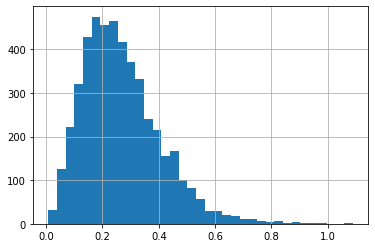

In [79]:
X_scaled.euclidian.hist(bins=35)

### Classification in 4 levels of complexity

In [102]:
# Classification function based on 4 quantiles

def classification(x):
    if x < X_scaled.euclidian.quantile(0.25):
        return 0
    if x >= X_scaled.euclidian.quantile(0.25) and x < X_scaled.euclidian.quantile(0.5):
        return 1
    if x >= X_scaled.euclidian.quantile(0.5) and x < X_scaled.euclidian.quantile(0.75):
        return 2
    if x >= X_scaled.euclidian.quantile(0.75):
        return 3

In [104]:
# Applying class to each rows

X_scaled['complexity'] = 0
X_scaled['complexity'] = X_scaled.apply(lambda x: classification(x['euclidian']), axis=1)

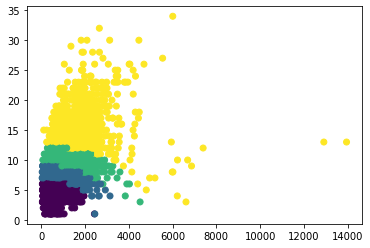

In [105]:
# Checking the 4 classes

plt.scatter(x = X['length_of_instructions'],y= X['number_of_ingredients'] , c=X_scaled['complexity'], cmap='viridis')

In [106]:
### Class Transformation and merge with main database
data = pd.concat([data,X_scaled['complexity']],axis=1)


complexity_labels = {0 : 'easy', 1 : 'medium', 2: 'hard', 3: 'very hard'}

data['complexity_label'] = data['complexity'].map(complexity_labels)   

In [72]:
X_scaled

,number_of_ingredients,length_of_instructions,euclidian,class
0,0.181818,0.041187,0.186425,1
1,0.272727,0.059086,0.279054,2
2,0.090909,0.022570,0.093669,0
3,0.181818,0.030549,0.184367,1
4,0.181818,0.042913,0.186814,1
...,...,...,...,...
4800,0.515152,0.050532,0.517624,3
4801,0.424242,0.117021,0.440086,3
4802,0.363636,0.046435,0.366589,3
4803,0.181818,0.058726,0.191067,1


In [107]:
data

,Title,Instructions,Image_Name,Ingredients,Cleaned_Ingredients,Relabelled_Ingredients,Tokenized_Ingredients,apple,banana,beef,...,strawberry,sugar,tomato,Remove,Prep Time,Prep Time Range,number_of_ingredients,length_of_instructions,complexity,complexity_label
0,Crispy Salt and Pepper Potatoes,Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"[2 large egg whites, 1 pound new potatoes (abo...","[egg white, potato, salt, black pepper, rosema...","[egg, potato, salt, black pepper, rosemary, th...","[egg, potato, salt, black, pepper, rosemary, t...",0,0,0,...,0,0,0,0,34,1 - 2 hours,7,613,1,medium
1,Thanksgiving Mac and Cheese,Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"[1 cup evaporated milk, 1 cup whole milk, 1 ts...","[milk, milk, garlic powder, onion powder, smok...","[milk, milk, garlic powder, onion, smoked papr...","[milk, milk, garlic, powder, onion, smoked, pa...",0,0,0,...,0,0,0,0,44,1 - 2 hours,10,862,2,hard
2,Warm Comfort,Place 2 chamomile tea bags in a heatsafe vesse...,warm-comfort-tequila-chamomile-toddy,"[2 chamomile tea bags, 1½ oz. reposado tequila...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile tea bag, reposado tequila, lemon ju...","[chamomile, tea, bag, reposado, tequila, lemon...",0,0,0,...,0,0,0,0,21,0 - 1 hours,4,354,0,easy
3,Apples and Oranges,"Add 3 oz. Grand Marnier, 1 oz. Amaro Averna, a...",apples-and-oranges-spiked-cider,"[3 oz. Grand Marnier, 1 oz. Amaro Averna, Smal...","[grand marnier, amaro averna, pat butter, hot ...","[grand marnier, amaro averna, butter, hot appl...","[grand, marnier, amaro, averna, butter, hot, a...",0,0,0,...,0,0,0,0,18,0 - 1 hours,7,465,1,medium
4,Turmeric Hot Toddy,"For the turmeric syrup, combine ½ cup hot wate...",turmeric-hot-toddy-claire-sprouse,"[¼ cup granulated sugar, ¾ tsp. ground turmeri...","[granulated sugar, turmeric, amontillado sherr...","[sugar, turmeric, amontillado sherry, bourbon ...","[sugar, turmeric, amontillado, sherry, bourbon...",0,0,0,...,0,1,0,0,30,0 - 1 hours,7,637,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,Cornmeal Pancakes with Honey-Pecan Butter,"Using electric mixer, beat 1/2 cup butter, hon...",cornmeal-pancakes-with-honey-pecan-butter-108554,[1/2 cup (1 stick) unsalted European-style but...,"[stick europeanstyle butter, honey, generous p...","[butter, honey, generous pinch cinnamon, toast...","[butter, honey, generous, pinch, cinnamon, toa...",0,0,0,...,0,1,0,0,34,1 - 2 hours,18,743,3,very hard
4801,Ginger-Pecan Roulade with Honey-Glazed Pecans,Preheat oven to 350°F. Line bottom and sides o...,ginger-pecan-roulade-with-honey-glazed-pecans-...,"[1/2 stick (1/4 cup) unsalted butter, melted, ...","[stick butter additional brushing pan, pecan t...","[butter, pecan toasted cooled, flour, unsweete...","[butter, pecan, toasted, cooled, flour, unswee...",0,0,0,...,0,1,0,0,55,1 - 2 hours,15,1668,3,very hard
4802,Brownie Pudding Cake,Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"[1 cup all-purpose flour, 2/3 cup unsweetened ...","[allpurpose flour, unsweetened cocoa powder, d...","[flour, unsweetened cocoa powder, doubleacting...","[flour, unsweetened, cocoa, powder, doubleacti...",0,0,0,...,0,1,0,0,54,1 - 2 hours,13,686,3,very hard
4803,Rice with Soy-Glazed Bonito Flakes and Sesame ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,[Leftover katsuo bushi (dried bonito flakes) f...,[leftover katsuo bushi dried bonito making das...,[leftover katsuo bushi dried bonito making das...,"[leftover, katsuo, bushi, dried, bonito, makin...",0,0,0,...,0,1,0,0,47,1 - 2 hours,7,857,1,medium


## Allegerns and Food Preferences

### Listing all the allergens 

In [156]:
#brut allergens
allergens = ['eggs','milk','mustard','peanut','soy', 'walnut', 'almond', 'hazelnut', 'pecan', 'cashew', 'pistachio','wheat']
vegetarian_stopwords = ['beef','chicken','meat','fish','seafood','bacon','lard']
vegan_stopwords =['beef','chicken','meat','fish','seafood','bacon','lard','eggs','casein','whey','lactose','gelatin','honey']

#lemmatize allergens

allergens_lem = [lemmatizer.lemmatize(w) for w in allergens]
vegetarian_lem = [lemmatizer.lemmatize(w) for w in vegetarian_stopwords]
vegan_lem = [lemmatizer.lemmatize(w) for w in vegan_stopwords]


### Function to check allergens and one-hot-encoded then

In [143]:
def check (list_of_ingredients, allergen):
    if allergen in list_of_ingredients:
        return 1
    else:
        return 0


In [150]:
## one-hot-encoding

data[allergens_lem] = 0

for i in range(len(allergens_lem)):
    data[allergens_lem[i]] = data.apply(lambda x: check(x['Tokenized_Ingredients'],allergens_lem[i]), axis = 1 )

### Vegan and Vegetarian Recipes

In [199]:
### function to check list in list

def two_lists_check(veg, ingredients):
    if any(item in veg for item in ingredients):
        return 0
    else:
        return 1

In [200]:
## applying function
data['vegetarian'] = 1
data['vegan'] = 1

data['vegetarian'] = data['Tokenized_Ingredients'].apply(lambda x: two_lists_check(vegetarian_lem,x))
data['vegan'] = data['Tokenized_Ingredients'].apply(lambda x: two_lists_check(vegan_lem,x))

# Export to csv

In [205]:
from pathlib import Path  
filepath = Path('../raw_data/recipes_with_allergens.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath) 